## Name:Vaishnav thorwat

# Task 5: SALES PREDICTION USING PYTHON

## Problem Statement

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
#Loading dataset
df=pd.read_csv('Advertising.csv')

## Performing EDA

In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
#dropping Unwanted Column
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
#Checking null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#checking duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualization 

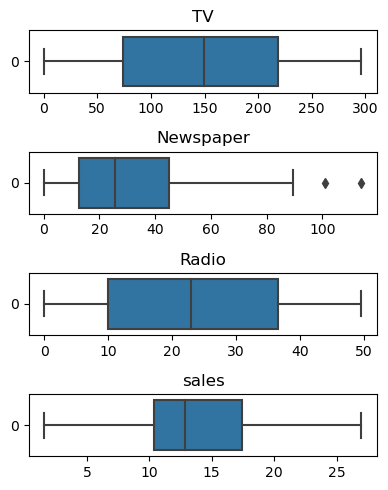

In [51]:
#outlier detection
fig, axs = plt.subplots(4, figsize = (4,5))
plt1 = sns.boxplot(df['TV'],ax = axs[0],orient = "h")
plt2 = sns.boxplot(df['Newspaper'],ax = axs[1],orient = "h",)
plt3 = sns.boxplot(df['Radio'],ax = axs[2],orient ="h")
plt4 = sns.boxplot(df['Sales'],ax = axs[3],orient ="h")
axs[0].title.set_text("TV")
axs[1].title.set_text("Newspaper")
axs[2].title.set_text("Radio")
axs[3].title.set_text("sales")
plt.tight_layout()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

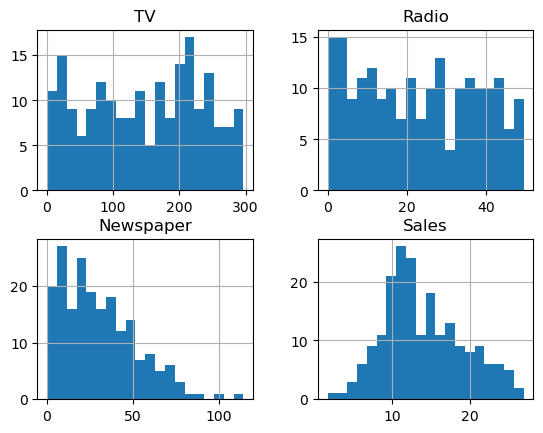

In [38]:
df.hist(bins=20)

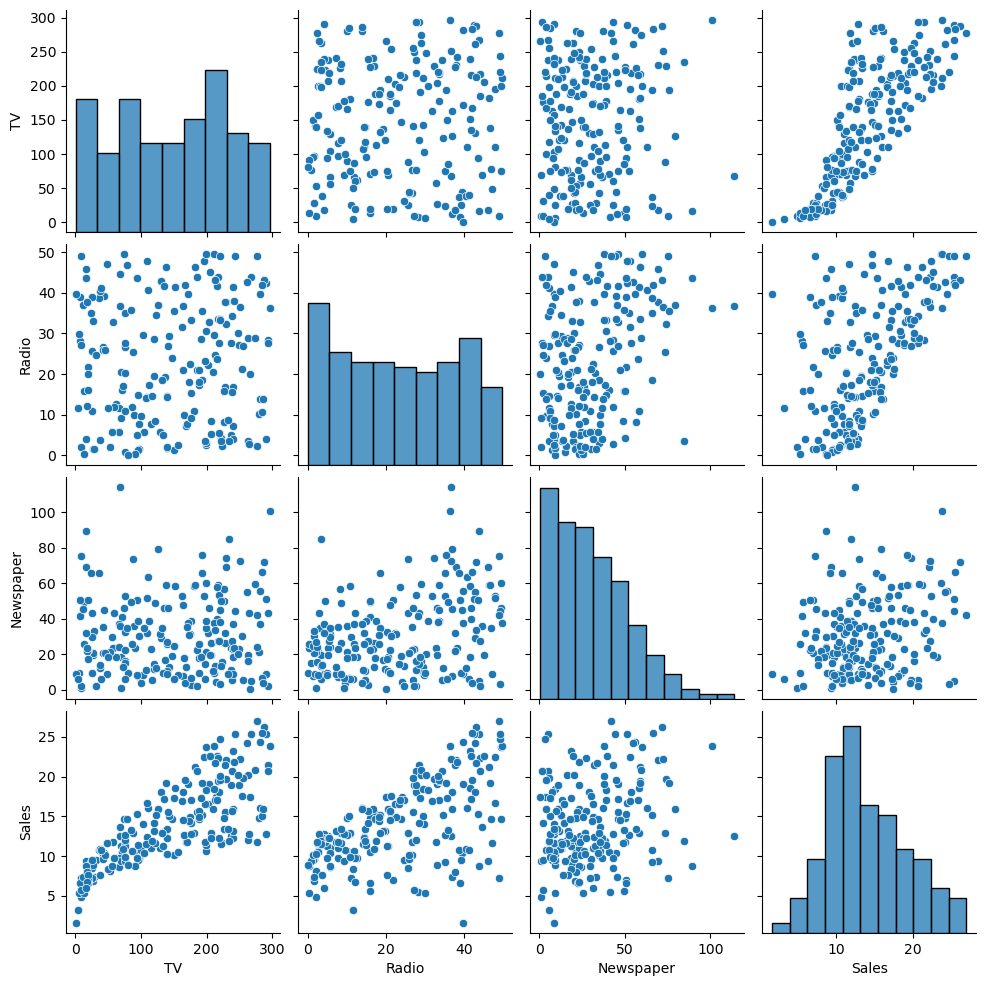

In [33]:
sns.pairplot(data=df)

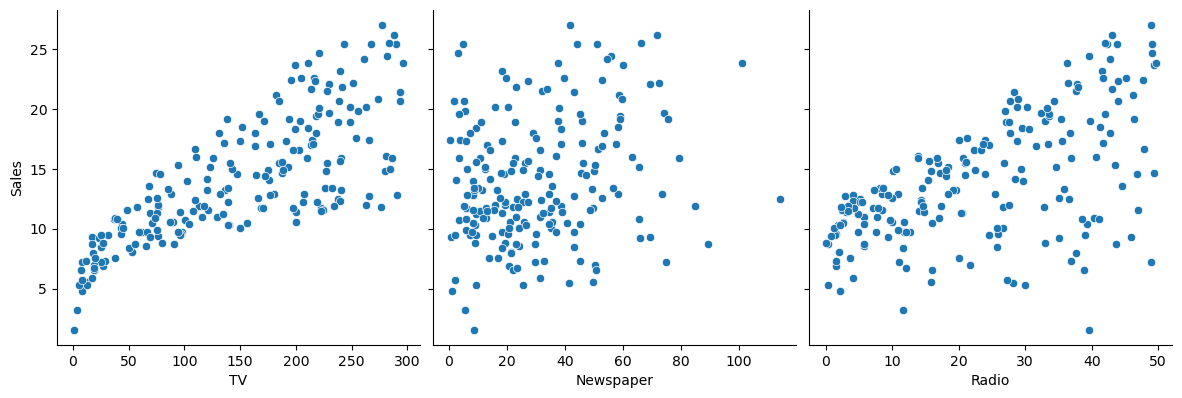

In [32]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1,kind='scatter')
plt.show()

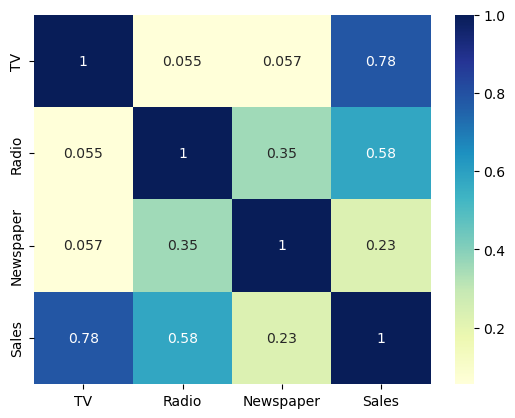

In [14]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

TV appears to have the high correlation with sales.

In [52]:
x=df['TV']
y=df['Sales']

## Training Model

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
x_test.shape
y_test.shape

(40,)

In [20]:
x_train.shape
y_train.shape

(160,)

## XGBoost Regressor

In [21]:
from xgboost import XGBRegressor

In [22]:
regressor=XGBRegressor()

In [23]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
sales_prediction = regressor.predict(x_train)

## Model Evaluation

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
r2_sales = r2_score(y_train, sales_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.9852918849313079


In [29]:
prediction = regressor.predict(x_test)

In [30]:
r2_data = metrics.r2_score(y_test, prediction)

In [31]:
print('R Squared value = ', r2_data)

R Squared value =  0.6539776437592424
